In [1239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import statsmodels.api as sm
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [1240]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# submission = pd.read_csv('sample_submission.csv')
# train_v1 = train.copy()

In [1241]:
train_v1 = pd.concat([train, test], sort=False)

In [1242]:
train_v1.shape

(2919, 81)

In [1243]:
train_v1['LotFrontage'] = train_v1['LotFrontage'].fillna(train_v1['LotFrontage'].median())

In [1244]:
train_v1.drop(['Alley'], axis=1, inplace=True)

In [1245]:
train_v1.drop(['MasVnrType'], axis=1, inplace=True)

In [1246]:
train_v1.drop(['MasVnrArea'], axis=1, inplace=True)

In [1247]:
train_v1['BsmtQual'] = train_v1['BsmtQual'].fillna('Not applicable')
train_v1['BsmtCond'] = train_v1['BsmtCond'].fillna('Not applicable')
train_v1['BsmtExposure'] = train_v1['BsmtExposure'].fillna('Not applicable')
train_v1['BsmtFinType1'] = train_v1['BsmtFinType1'].fillna('Not applicable')
train_v1['BsmtFinType2'] = train_v1['BsmtFinType2'].fillna('Not applicable')

In [1248]:
train_v1['Electrical'] = train_v1['Electrical'].fillna(train_v1['Electrical'].mode()[0])

In [1249]:
train_v1['FireplaceQu'] = train_v1['FireplaceQu'].fillna('Not applicable')

In [1250]:
train_v1['GarageType'] = train_v1['GarageType'].fillna('Not applicable')
train_v1['GarageYrBlt'] = train_v1['GarageYrBlt'].fillna(0)
train_v1['GarageFinish'] = train_v1['GarageFinish'].fillna('Not applicable')
train_v1['GarageQual'] = train_v1['GarageQual'].fillna('Not applicable')
train_v1['GarageCond'] = train_v1['GarageCond'].fillna('Not applicable')

In [1251]:
train_v1['PoolQC'] = train_v1['PoolQC'].fillna('Not applicable')

In [1252]:
train_v1['Fence'] = train_v1['Fence'].fillna('Not applicable')

In [1253]:
train_v1['MiscFeature'] = train_v1['MiscFeature'].fillna('Not applicable')

In [1254]:
train_v1['MSZoning'] = train_v1['MSZoning'].fillna(0)

In [1255]:
train_v1['Utilities'] = train_v1['Utilities'].fillna(0)

In [1256]:
train_v1['Exterior1st'] = train_v1['Exterior1st'].fillna(0)

In [1257]:
train_v1['Exterior2nd'] = train_v1['Exterior2nd'].fillna(0)

In [1258]:
train_v1['BsmtFinSF1'] = train_v1['BsmtFinSF1'].fillna(0)

In [1259]:
train_v1['BsmtFinSF2'] = train_v1['BsmtFinSF2'].fillna(0)

In [1260]:
train_v1['BsmtUnfSF'] = train_v1['BsmtUnfSF'].fillna(0)

In [1261]:
train_v1['TotalBsmtSF'] = train_v1['TotalBsmtSF'].fillna(0)

In [1262]:
train_v1['BsmtFullBath'] = train_v1['BsmtFullBath'].fillna(0)

In [1263]:
train_v1['BsmtHalfBath'] = train_v1['BsmtHalfBath'].fillna(0)

In [1264]:
train_v1['KitchenQual'] = train_v1['KitchenQual'].fillna(0)

In [1265]:
train_v1['Functional'] = train_v1['Functional'].fillna(0)

In [1266]:
train_v1['SaleType'] = train_v1['SaleType'].fillna(0)

In [1267]:
train_v1['GarageArea'] = train_v1['GarageArea'].fillna(0)

In [1268]:
train_v1['GarageCars'] = train_v1['GarageCars'].fillna(0)

In [1269]:
train_encoded = pd.get_dummies(train_v1, columns=['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir','Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype=int)

In [1270]:
train_encoded.dtypes[~train_encoded.dtypes.isin(['int64', 'int32', 'float64'])]

Series([], dtype: object)

In [1271]:
train_processed = train_encoded[train_encoded['SalePrice'].notna()]
test_processed = train_encoded[train_encoded['SalePrice'].isna()]

In [1272]:
print(train_processed.shape)
print(test_processed.shape)

(1460, 318)
(1459, 318)


In [1273]:
Y_train = train_processed['SalePrice']
train_processed.drop(['SalePrice','Id'], axis=1, inplace=True)
X_train = train_processed

C:\Users\Vishnu Kumar\AppData\Local\Temp\ipykernel_2108\2249291267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed.drop(['SalePrice','Id'], axis=1, inplace=True)


In [1274]:
# test_processed.drop(['SalePrice'], axis=1, inplace=True)
X_test = test_processed
X_test.drop(['SalePrice'], axis=1, inplace=True)

C:\Users\Vishnu Kumar\AppData\Local\Temp\ipykernel_2108\3539544712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['SalePrice'], axis=1, inplace=True)


In [1184]:
X_train = sm.add_constant(X_train)

In [1185]:
model = sm.OLS(Y_train, X_train).fit()

# Get p-values for each feature
p_values = model.pvalues

In [1187]:
alpha = 0.05

# Select features with p-values less than alpha
significant_features = p_values[p_values < alpha].index

# Drop the constant term if present
if 'const' in significant_features:
    significant_features = significant_features.drop('const')

print("Significant features based on p-values:")
print(significant_features)
print(significant_features.size)

Significant features based on p-values:
Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'ScreenPorch',
       'PoolArea', 'MoSold', 'MSSubClass_150', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Condition2_PosA',
       'Condition2_PosN', 'RoofStyle_Shed', 'RoofMatl_ClyTile',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'GarageQual_Ex',
       'GarageCond_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_Not applicable'],
      dtype='object')
41


In [1275]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train[selected_features], Y_train, test_size=0.2, random_state=42)

In [1279]:
def train_and_evaluate_model(model, X_train, Y_train, X_valid, Y_valid):
    # Train the model
    model.fit(X_train[selected_features], Y_train)
    
    # Predict on training and validation data
    Y_train_pred = model.predict(X_train[selected_features])
    Y_valid_pred = model.predict(X_valid[selected_features])
    
    # Evaluate the model
    train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
    valid_rmse = np.sqrt(mean_squared_error(Y_valid, Y_valid_pred))
    
    train_mae = mean_absolute_error(Y_train, Y_train_pred)
    valid_mae = mean_absolute_error(Y_valid, Y_valid_pred)
    
    print(f"Training RMSE: {train_rmse:.2f}, Validation RMSE: {valid_rmse:.2f}")
    print(f"Training MAE: {train_mae:.2f}, Validation MAE: {valid_mae:.2f}")

    
    return model

In [1280]:
# Initialize models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)
svr = SVR()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
knn = KNeighborsRegressor()
xgb = XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)
catboost = CatBoostRegressor(random_state=42, verbose=0)
# List of models
models = [linear_reg, decision_tree_reg, random_forest_reg, gradient_boosting_reg, svr, ridge, lasso, elastic_net, knn, xgb, lgbm, catboost]

# Train and evaluate each model
i=0
for model in models:
    print(f"\nTraining and evaluating {model.__class__.__name__}...")
    trained_model = train_and_evaluate_model(model, X_train, Y_train, X_valid, Y_valid)
    
    predict_input = X_test.copy()
    print(predict_input.shape)
    id_column = predict_input['Id'].copy()  # Ensure column name matches exactly
    predict_input.drop(columns=['Id'], inplace=True)
    final_predictions = model.predict(predict_input[selected_features])

    # Create submission file
    submission_df = pd.DataFrame({'Id': id_column, 'SalePrice': final_predictions})
    
    submission_df.to_csv(f'submission{i}.csv', index=False)
    
    i += 1


Training and evaluating LinearRegression...
Training RMSE: 27258.73, Validation RMSE: 30829.76
Training MAE: 16745.96, Validation MAE: 19179.70
(1459, 317)

Training and evaluating DecisionTreeRegressor...
Training RMSE: 0.00, Validation RMSE: 37765.76
Training MAE: 0.00, Validation MAE: 25568.39
(1459, 317)

Training and evaluating RandomForestRegressor...
Training RMSE: 10843.97, Validation RMSE: 28179.08
Training MAE: 6501.01, Validation MAE: 17577.88
(1459, 317)

Training and evaluating GradientBoostingRegressor...
Training RMSE: 13309.82, Validation RMSE: 26720.41
Training MAE: 9830.77, Validation MAE: 17099.85
(1459, 317)

Training and evaluating SVR...
Training RMSE: 78946.64, Validation RMSE: 88652.87
Training MAE: 54535.67, Validation MAE: 59556.56
(1459, 317)

Training and evaluating Ridge...
Training RMSE: 27381.49, Validation RMSE: 30948.60
Training MAE: 16803.73, Validation MAE: 19110.74
(1459, 317)

Training and evaluating Lasso...
Training RMSE: 27261.74, Validation RMS

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.347e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.316e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Training RMSE: 37590.02, Validation RMSE: 47886.57
Training MAE: 24031.55, Validation MAE: 28763.44
(1459, 317)

Training and evaluating XGBRegressor...
Training RMSE: 1268.71, Validation RMSE: 27105.12
Training MAE: 883.96, Validation MAE: 17633.49
(1459, 317)

Training and evaluating LGBMRegressor...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2802
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 75
[LightGBM] [Info] Start training from score 181441.541952
Training RMSE: 11391.57, Validation RMSE: 28365.91
Training MAE: 5517.05, Validation MAE: 16675.37
(1459, 317)

Training and evaluating CatBoostRegressor...
Training RMSE: 5438.10, Validation RMSE: 24785.87
Training MAE: 4173.50, Validation MAE: 15408.44
(1459, 317)


Selected Features:  Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RM',
       'LotShape_IR1', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Lvl',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition2_PosN', 'Exterior1st_BrkFace', 'ExterQual_Gd',
       'ExterQual_TA', 'BsmtQual_Ex', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtFinType1_GLQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf'

AttributeError: 'RFECV' object has no attribute 'grid_scores_'

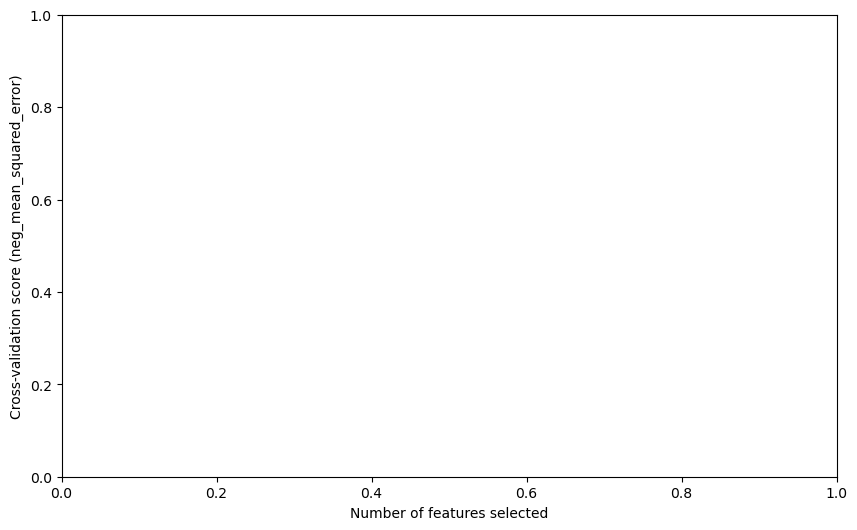

In [1276]:
# Initialize the CatBoost model with fewer iterations to speed up RFECV
catboost_model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_seed=42, silent=True)

# Initialize RFECV with CatBoost, using fewer folds and a larger step size
rfecv = RFECV(estimator=catboost_model, step=5, cv=3, scoring='neg_mean_squared_error')

# Fit RFECV using a sample of the data to speed up the process
sample_X_train = X_train.sample(frac=0.5, random_state=42)
sample_y_train = Y_train.sample(frac=0.5, random_state=42)
rfecv.fit(sample_X_train, sample_y_train)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]

# Print the selected features
print("Selected Features: ", selected_features)

# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Use the selected features to create a new DataFrame
X_train_selected = X_train[selected_features]
X_valid_selected = X_valid[selected_features]

In [1235]:
selected_features.shape

(124,)